Aviation Accident Analysis
This project is meant to explore, analyse and visualize aviation accidents and related factors such as reasons, survival rates, fatalities, locations etc.

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

In [9]:
import pandas as pd 
avi_data= pd.read_csv(r'C:\Users\mhaasa\Downloads\Dataset1.csv')
print(avi_data)

            Date   Time                                           Location  \
0     09/17/1908  17:18                                Fort Myer, Virginia   
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #  \
0            

In [10]:
avi_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [11]:
avi_data.shape

(5268, 13)

In [12]:
avi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [13]:
avi_data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [14]:
#missing data check

avi_data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [17]:
# Replacing time Nan values to time formate 
import numpy as np
avi_data['Time']= avi_data['Time'].replace(np.nan, '00:00')

In [18]:
avi_data.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [19]:
avi_data['Time'].value_counts()

00:00    2223
15:00      32
12:00      31
11:00      29
19:30      26
         ... 
16:46       1
11:53       1
12:53       1
00:28       1
17:07       1
Name: Time, Length: 1005, dtype: int64

In [20]:
avi_data['Time']

0       17:18
1       06:30
2       00:00
3       18:30
4       10:30
        ...  
5263    06:30
5264    00:00
5265    00:15
5266    08:30
5267    00:00
Name: Time, Length: 5268, dtype: object

In [22]:
#replacing the unwanted symbols/ charecter

avi_data['Time'] = avi_data['Time'].str.replace('c: ','')
avi_data['Time'] = avi_data['Time'].str.replace('c:','')
avi_data['Time'] = avi_data['Time'].str.replace('c','')
avi_data['Time'] = avi_data['Time'].str.replace('12\'20','12:20')
avi_data['Time'] = avi_data['Time'].str.replace('18.40','18:40')
avi_data['Time'] = avi_data['Time'].str.replace('0943','09:43')
avi_data['Time'] = avi_data['Time'].str.replace('22\'08','22:08')
avi_data['Time'] = avi_data['Time'].str.replace('114:20','00:00')

In [ ]:
#convert time column into datatype datetime64 
avi_data['Time'] = (avi_data['Date'] + ' ' +avi_data['Time']).astype(str)
avi_data['Time']=pd.to_datetime(avi_data['Time'], dayfirst=True)

In [24]:
avi_data['Time']

0       09/17/1908 09/17/1908 17:18
1       07/12/1912 07/12/1912 06:30
2       08/06/1913 08/06/1913 00:00
3       09/09/1913 09/09/1913 18:30
4       10/17/1913 10/17/1913 10:30
                   ...             
5263    05/20/2009 05/20/2009 06:30
5264    05/26/2009 05/26/2009 00:00
5265    06/01/2009 06/01/2009 00:15
5266    06/07/2009 06/07/2009 08:30
5267    06/08/2009 06/08/2009 00:00
Name: Time, Length: 5268, dtype: object

In [25]:
# data start date

avi_data.Time.min()

'01/01/1966 01/01/1966 00:00'

In [26]:
# data end data

avi_data.Time.max()

'12/31/1997 12/31/1997 07:45'

In [27]:
import pandas as pd 
avi_data= pd.read_csv(r'C:\Users\mhaasa\Downloads\Dataset1.csv')
print(avi_data)

            Date   Time                                           Location  \
0     09/17/1908  17:18                                Fort Myer, Virginia   
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #  \
0            

In [29]:
avi_data.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [30]:
#converting operator into upper case

avi_data['Operator']= avi_data.Operator.str.upper()

In [31]:
avi_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


### Exploratory Data Analysis

In [32]:
avi_data["Location"].value_counts()

Moscow, Russia                      15
Sao Paulo, Brazil                   15
Rio de Janeiro, Brazil              14
Bogota, Colombia                    13
Anchorage, Alaska                   13
                                    ..
Off Algiers                          1
Near Grenoble, France                1
San Francisco de Moxos,  Bolivia     1
Engle, New Mexico                    1
Kishiniev, Moldavia, USSR            1
Name: Location, Length: 4303, dtype: int64

### Count of accidents by flight type

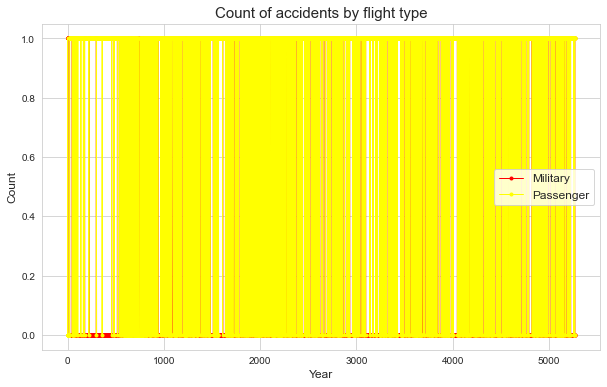

In [84]:
plt.figure(figsize=(10,6))
plt.plot(flight_typ_acc.index, 'Military', data=flight_typ_acc, color='red', marker='.', linewidth=1)
plt.plot(flight_typ_acc.index, 'Passenger', data=flight_typ_acc, color='yellow', marker='.', linewidth=1)
plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by flight type', fontsize=15)
plt.show()

## Observation

 1)  Military flights accidents are not frequently occured more, but only at 1940 the number of accidents was quiet more than        the normal case

 2) Flight accidents in passenger flights are more in number till 1980, later years it gradualy decreased and in the year 2009     accident number recored was in the range 20

### Passenger vs military flights

In [79]:
flight_typ= avi_data.copy()
flight_typ['isMilitary'] = flight_typ.Operator.str.contains('MILITARY')
flight_typ = flight_typ.groupby('isMilitary')[['isMilitary']].count()
flight_typ.index = ['Passenger', 'Military']
flight_typ

,isMilitary
Passenger,4469
Military,781


Text(0.5, 1.0, 'Total number of accidents by flight type')

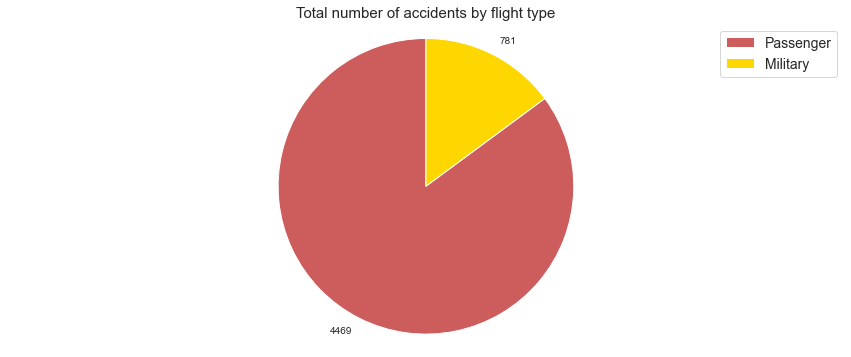

In [80]:
#Total number of accidents by flight type

colors = ['indianred', 'gold']
plt.figure(figsize=(15,6))
plt.pie(flight_typ.isMilitary, colors=colors, labels=flight_typ.isMilitary, startangle=90)
plt.legend( flight_typ.index, fontsize=14)
plt.axis('equal')
plt.title('Total number of accidents by flight type', fontsize=15)